In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
%matplotlib inline

# Making Dataset

Making a sin serie for 1500 timestep with random noise

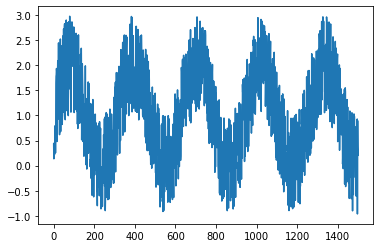

In [2]:
t = np.arange(0, 1500)
x = np.sin(0.02*t) + np.random.rand(1500) * 2
plt.plot(x)
plt.show()

# Train and test split

The first 1000  considered for train and the other 500 considered for test.

In [3]:
train, test = x[0:1000], x[1000:]

# Data processing and make input and label

In RNN, step will be considered for input.

    x = [1,2,3,4,5,6,7,8,9,10]

    for step=1, x input and its y prediction becomes:

    x  y
    1  2
    2  3
    3  4
    4  5
    ..
    9 10

    for step=3, x and y contain:

    x          y
    1,2,3      4
    2,3,4      5
    3,4,5      6
    4,5,6      7
    ...
    7,8,9      10

In [5]:
step = 10

# convert into dataset data and label
def convertToDataset(data, step):
    # data = np.append(data, np.repeat(data[-1], step))
    
    X, Y = [],[]
    for i in range(len(data)-step):
        d = i + step
        X.append(data[i:d,])
        Y.append(data[d, ])
    return np.array(X), np.array(Y)

trainX, trainY = convertToDataset(train, step)
testX, testY = convertToDataset(test, step)

In [6]:
print(trainX.shape)
print(testX.shape)

(990, 10)
(490, 10)


# Data dimension change for input to network

A input of RNN in Kers:
                (NumberOfSequences, TimeSteps, ElementsPerStep)

In [7]:
trainX = np.reshape(trainX, (trainX.shape[0],  trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1], 1))

In [8]:
print(trainX.shape)
print(testX.shape)

(990, 10, 1)
(490, 10, 1)


# Netwrok architecture and Compilation

In [9]:
model = Sequential()
model.add(SimpleRNN(units=64, activation="tanh"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')

# Model training

In [10]:
history = model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)


Epoch 1/100
 - 1s - loss: 0.6168
Epoch 2/100
 - 0s - loss: 0.4099
Epoch 3/100
 - 0s - loss: 0.4059
Epoch 4/100
 - 0s - loss: 0.3947
Epoch 5/100
 - 0s - loss: 0.3899
Epoch 6/100
 - 0s - loss: 0.3907
Epoch 7/100
 - 0s - loss: 0.3870
Epoch 8/100
 - 0s - loss: 0.3864
Epoch 9/100
 - 0s - loss: 0.3800
Epoch 10/100
 - 0s - loss: 0.3762
Epoch 11/100
 - 0s - loss: 0.3779
Epoch 12/100
 - 0s - loss: 0.3752
Epoch 13/100
 - 0s - loss: 0.3787
Epoch 14/100
 - 0s - loss: 0.3690
Epoch 15/100
 - 0s - loss: 0.3693
Epoch 16/100
 - 0s - loss: 0.3653
Epoch 17/100
 - 0s - loss: 0.3650
Epoch 18/100
 - 0s - loss: 0.3627
Epoch 19/100
 - 0s - loss: 0.3610
Epoch 20/100
 - 0s - loss: 0.3529
Epoch 21/100
 - 0s - loss: 0.3550
Epoch 22/100
 - 0s - loss: 0.3569
Epoch 23/100
 - 0s - loss: 0.3555
Epoch 24/100
 - 0s - loss: 0.3495
Epoch 25/100
 - 0s - loss: 0.3507
Epoch 26/100
 - 0s - loss: 0.3425
Epoch 27/100
 - 0s - loss: 0.3414
Epoch 28/100
 - 0s - loss: 0.3368
Epoch 29/100
 - 0s - loss: 0.3377
Epoch 30/100
 - 0s - l

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 64)                4224      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


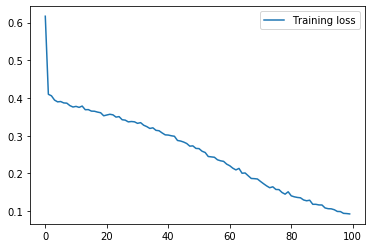

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
plt.plot(loss, label = 'Training loss')
plt.legend()

plt.show()

# Model evaluation

In [13]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

0.08112317718038656


# Drawing main serie and prediction for train and test data

In [14]:
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

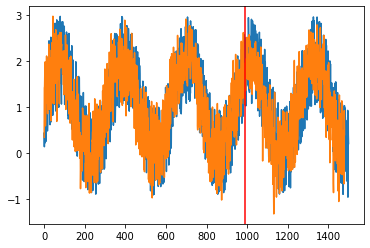

In [15]:
plt.plot(x)
plt.plot(predicted)
plt.axvline(len(trainX), c="r")
plt.show()

# Model input with different length

In [16]:
testX, testY = convertToDataset(test, 50)

In [17]:
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
testX.shape

(450, 50, 1)

In [18]:
model.input

<tf.Tensor 'sequential_1_input:0' shape=(?, 10, 1) dtype=float32>